# Assignment 5: Decision Trees and Ensemble Methods [ __ / 70  marks]

<img src="https://datasciencetoday.net/images/2018/11/27/tree.png">

For this assignment we will use standalone and ensembled decision trees (Bagging, AdaBoost) in order to predict whether particular red wines are `high quality` or `low quality` based on some associated input features (e.g., fixed acidity, residual sugar, density, alcohol, etc). 

We will first import our data. Next, we will apply the pre-processing steps. Finally, we will construct and compare models. There will also be some communication questions along the way. 

I hope this week's lesson and this assignment will make you more comfortable with using and thinking about decision trees --- they're a very powerful tool.

## Before you start...
* check out the relevant lecture code for reference (`L9_CF.ipynb`)

## Before you submit...
* restart the kernel, then re-run the whole notebook to ensure no errors

In [73]:
# Importing required packages
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1.1 [ _ /3 marks]

Read the file `winequality-red.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Make sure to remove the semicolons.

`Hint`: Sometimes you will see that dataset entries are separated by `;`,`,`,`&`. You can use the `sep` argument in `read_csv()` to format it properly.

In [74]:
# ****** your code here ******
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1.2 [ _ /7 marks]

Before building our models, we will need to **preprocess** the data. Instead of using the 10-class column ('quality') directly, let's just focus on classifying red wines as `'high quality'` or `'low quality'` by manually assigning a threshold. We will consider wines with 'quality' 7 or higher as **'high quality'** (class label `1`) and those with 'quality' 6 or lower as **'low quality'** (class label `0`). Replace the `quality` column with your new column (`CLASS`). 

Display the first 5 rows of the new dataframe. How many instances of class `0` and class `1` are there? [ /1 mark] Is the data class-balanced? [ /1 mark] 

In [75]:
# Replace dependent variable 'quality' with `CLASS` (labels 0 and 1) [ /4 marks]
# ****** your code here ******

label = []
Class = df["quality"]

num_ones = 0
num_zeros = 0
for quality in Class:
    if (quality >= 7):
        label.append(1)
        num_ones += 1
    else:
        label.append(0)
        num_zeros += 1

df["CLASS"] = label
df = df.drop("quality",axis=1)

# How many instances of class 0 and class 1 are there in the data? (code) [ /1 mark]
# ****** your code here ******

print("There are %d instances of class `0` and %d class `1` are there" % (num_zeros, num_ones))


There are 1382 instances of class `0` and 217 class `1` are there


In [76]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,CLASS
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**Your Answer**: There are 217 instances of class `1` and 1382 class `0` are there, the class is imbalanced

## Question 1.3 [ _ /3 marks]

Let's create our train and test sets. Create an input dataframe X (the input features); next, create an output series y which contains the output class labels (a column of `0`'s and `1`'s). Split the data into train and test sets with `train_test_split`. Use `test_size = 0.3`, `random_state = 0`.

In [77]:
# Store the feature data into X; store the class data into y [ /2 marks]
# ****** your code here ******
X = df.drop("CLASS", axis=1)
y = df.CLASS

# Do a train-test split. Use 30% of the data for testing. Use random state 0. [ /1 mark]
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [78]:
Xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
92,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8
1017,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
1447,6.8,0.67,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7
838,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2
40,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5


## Question 2.1 [ _ /13 marks]

For our first model we will **select a standalone decision tree of optimal maximum depth** (out of possible maximum depths ranging from `2 to 30`). 

To find the optimal maximum depth, create multiple decision trees with sklearn's `DecisionTreeClassifier` class (you can use a loop), then compute the mean Cross-Validation score for each (use 5-fold CV). You don't need to specify a scorer (Note: for `DecisionTreeClassifier` it's *mean accuracy*).

Create a plot which shows the mean CV scores on the y-axis and maximum depths on the x-axis. **Report the optimal maximum depth**. [ /2 marks]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


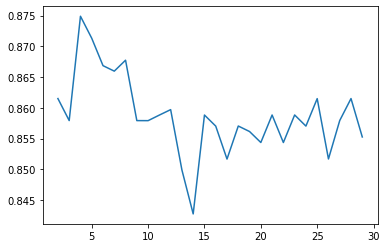

{'max_depth': 4}

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create and fit trees from max_depth 2 to max_depth 30. Use 5-fold CV for each. [ /8 marks]
# ****** your code here ******

params = {'max_depth': range(2, 30)}

decisiontree = DecisionTreeClassifier()

grid_search_cv =  GridSearchCV(decisiontree, params,verbose = 1, cv=5)
grid_search_cv.fit(Xtrain, ytrain)

# Plot the mean CV score vs. maximum depth [ /3 marks]
# ****** your code here ******
plt.plot(range(2, 30), grid_search_cv.cv_results_["mean_test_score"])
plt.show()

# Report the optimal max_depth either here or in the markdown cell below. [ /2 marks]
grid_search_cv.best_params_


**Your answer**: the optimal maximum depth is 4

## Question 2.2 [ _ /6 marks]

Consider your optimal max_depth tree (or, you can create a new one with that depth). Fit it to the training set. Report its test accuracy on the test set.

Hint: You can use `accuracy_score()` here to report the test accuracy.

In [80]:
# Fit your optimal-depth tree, then calculate test accuracy [ /6 marks]
# ****** your code here ******
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(Xtrain, ytrain)

y_pred = decisiontree.predict(Xtest)
acc_decisiontree = round(accuracy_score(y_pred, ytest) * 100, 2)
print("The test accuracy on the test set is %.2f." % acc_decisiontree)


The test accuracy on the test set is 89.58.


## Question 2.3 [ _ /4 marks] 

What is the **major shortcoming** of standalone decision trees? [ /2 marks] 

What is the **purpose of creating an ensemble of trees**? [ /2 marks]


**Your answer**:

What is the **major shortcoming** of standalone decision trees? [ /2 marks] 

The variance of the standalone decision trees is high.

What is the **purpose of creating an ensemble of trees**? [ /2 marks]

The purpose of creating an ensemle of trees is to reduce the variance of a decision tree.

## Question 3.1 [ _ /24 marks]

Let's now focus on creating an **ensemble of 500 trees**. For this question we'll consider Bagging (Bootstrap Aggregation). Follow these steps:
* **Step 1**: Create 500 Bootstrap samples (i.e. sample with replacement) from the dataset (specifically, sample from the training data).
* **Step 2**: Train a particular tree (`max_depth=4`) on each Bootstrap sample (you'll therefore need 500 trees in total)
* **Step 3**: Compute the **overall prediction** of your ensemble on the unseen test set. The overall prediction from each individual test input will come from a vote count from each of the 500 trees. **Report the test accuracy**.

To expand on the `voting` point from Step 3: For each test input, each tree will make a certain output prediction. So, for a single test input you'll have 500 votes, and these could be 1 or 0. For the overall prediction for that single test input, you'll count which class (0 or 1) got the most votes.

Note: Since this question is meant to be a manually done, you won't get the marks if you use sklearn's `BaggingClassifier` or similar.

In [81]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create 500 Bootstrap samples from the training set. Fit a tree to each [ /12 marks]
# ****** your code here ******
ntree = 500
tree_list = []

for i in range(ntree):
    newX = Xtrain.sample(Xtrain.shape[0], replace=True)
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(newX, ytrain)

    tree_list.append(tree)

# Make 500 predictions on the test data (unseen by your trees so far). [ /6 marks] 
# ****** your code here ******
ypred = tree_list[0].predict(Xtest)

# Finally, compute the overall vote for each prediction (the most votes for a given class wins) [ /4 marks]
# Hint: If there's a tie, the common way is to predict the class with the lowest class label
# However, it's also ok to use scipy.stats.mode here (this randomly picks tie winners)
# ****** your code here ******
y_pred_list = []
for i in range(ntree):
    y_pred_list.append(ypred)

vote_list = []
for i in range(480):
    num_ones = 0
    num_zeros = 0
    for j in range (500):
        if y_pred_list[j][i] == 0:
            num_zeros += 1
        else:
            num_ones += 1

    if (num_ones > num_zeros):
        vote_list.append(1)
    else:
        vote_list.append(0)

# Report (print) the accuracy of your ensemble model on the test set. Use accuracy_score() [ /2 marks]
# ****** your code here ******
acc_decisiontree = round(accuracy_score(vote_list, ytest) * 100, 2)
print(acc_decisiontree)


88.75


## Question 3.2 [ _ /6 marks]

Finally, let's consider AdaBoost. Here, each tree (a stump) is trained sequentially and relies on the previous tree for its training data (which was re-sampled, and this was influenced by the sample weight changes as a result of incorrect predictions from the previous tree). 

Create an `AdaBoostClassifier` object with `base_estimator = DecisionTreeClassifier(max_depth=4)`, `n_estimators=500`, `learning_rate=0.1`. Fit to the training data, and compute (and report) the test accuracy. You can use `accuracy_score()` here.


In [82]:
# Create an AdaBoostClassifier object with the specified arguments [ /2 marks]
# ****** your code here ******
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=4), n_estimators=500, learning_rate=0.1)

# Fit to the training data and compute the test predictions [ /2 marks]
# ****** your code here ******
adaboost.fit(Xtrain, ytrain)

# Compute and report the test accuracy [ /2 marks]
# ****** your code here ******
y_pred = adaboost.predict(Xtest)
acc_adaboost = round(accuracy_score(y_pred, ytest) * 100, 2)
print("The test accuracy on the test set is %.2f." % acc_adaboost)

The test accuracy on the test set is 91.67.


/Users/dongbochen/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


## Question 3.3 [ _ /4 marks]

Finally, compare the test accuracies of the models considered so far: the optimal max_depth Decision Tree, the bagged ensemble of 500 trees, and the AdaBoost ensemble of 500 trees. Which performed worst? Which performed best? Do the results agree with our intuition from the Lecture?

Hint: One intuition you could use from the lecture was that ensemble methods have **lower variance** than a single tree (i.e. less prone to overfitting).

**Your answer**:

The adaboost performs best, the bagged ensemle of 500 trees perform worst.

We can see that the adaboost is better than standalone tree on test set because it reduce the variance than a single tree.

Ensemle of 500 trees perform worst is because bagging a poor classifier may make it worse
